In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [24]:
df.drop(columns=['month','day','year'],axis=1, inplace=True)

In [25]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [26]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [27]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [28]:
X=df.drop('FWI', axis=1)
y=df['FWI']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((182, 11), (61, 11), (182,), (61,))

<Axes: >

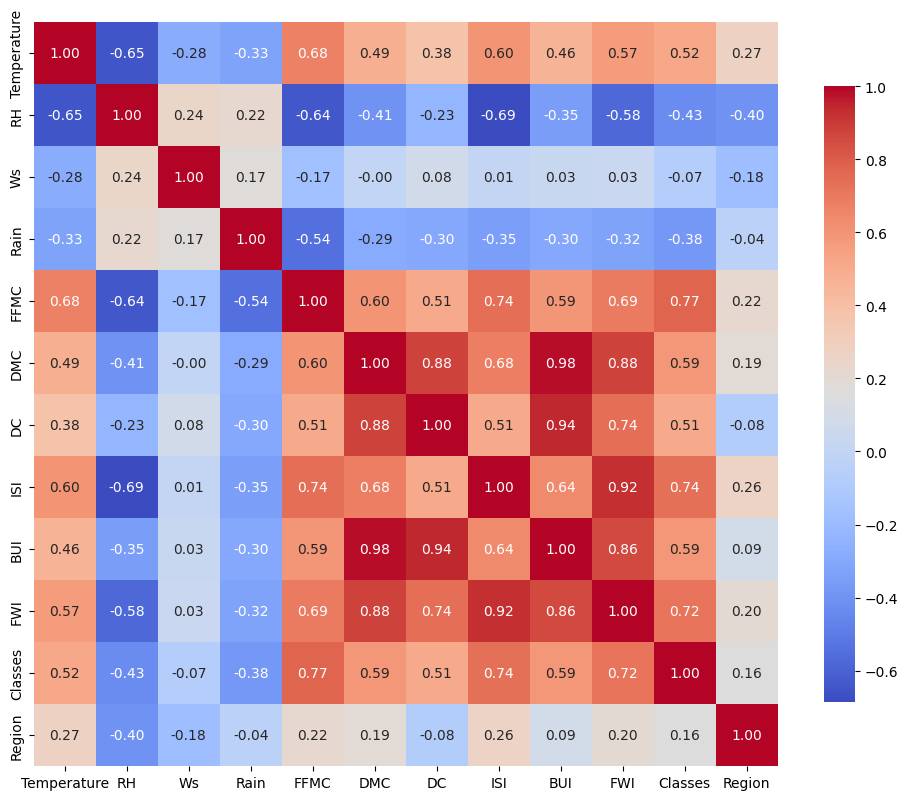

In [31]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

In [32]:
def correlation(data, threshold):
    col_corr = set()  
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # we are interested in absolute values
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [33]:
cf = correlation(X_train,0.85)

In [34]:
X_train.drop(columns=cf, inplace=True, axis=1)
X_test.drop(columns=cf, inplace=True, axis=1)
X_train.shape, X_test.shape

((182, 9), (61, 9))

<Axes: >

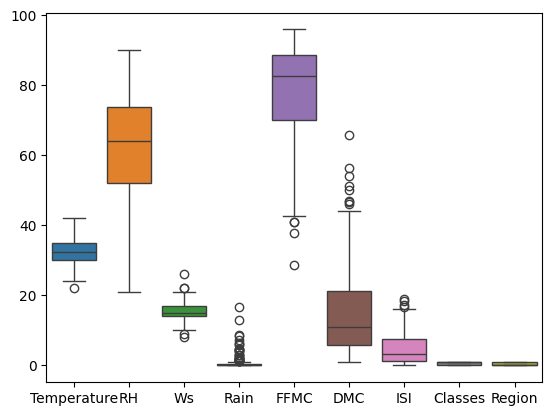

In [35]:
sns.boxplot(data=X_train)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<Axes: >

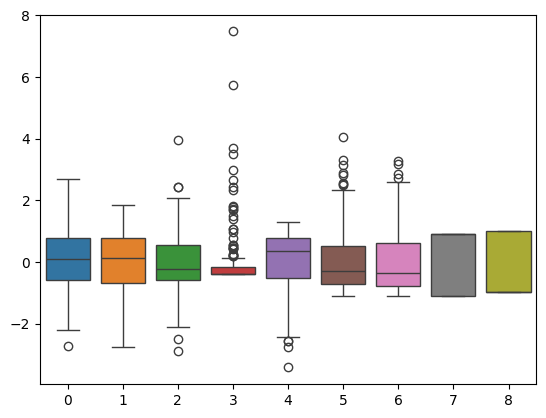

In [37]:
sns.boxplot(data=X_train)

In [38]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)

<Axes: xlabel='FWI', ylabel='FWI'>

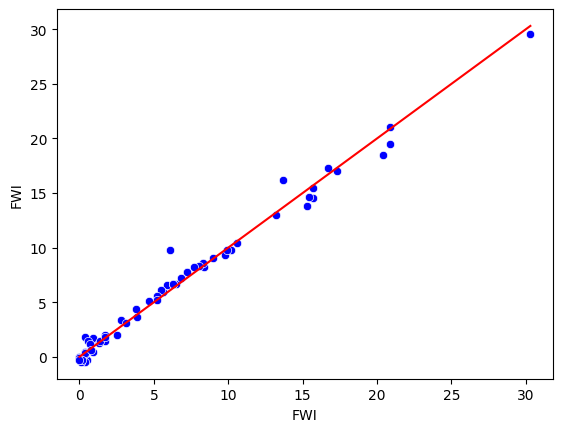

In [39]:
sns.scatterplot(x=y_test, y=y_pred, color='blue')
sns.lineplot(x=y_test, y=y_test, color='red')

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}') 
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.674276687379158
Mean Absolute Error: 0.5468236465249978
R^2 Score: 0.9847657384266951


Mean Squared Error: 2.2483458918974772
Mean Absolute Error: 1.133175994914409
R^2 Score: 0.9492020263112388


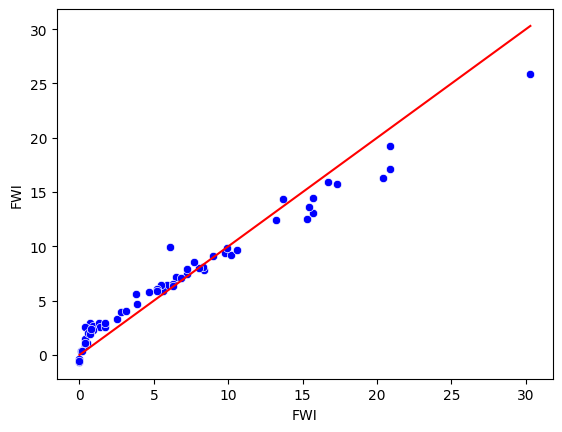

In [41]:
from sklearn.linear_model import Lasso

lin = Lasso()
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)
sns.scatterplot(x=y_test, y=y_pred, color='blue')
sns.lineplot(x=y_test, y=y_test, color='red')
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}') 
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.6949198918152096
Mean Absolute Error: 0.5642305340105715
R^2 Score: 0.9842993364555512


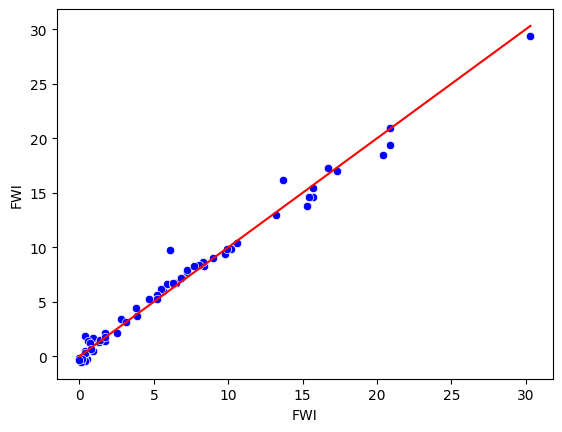

In [42]:
from sklearn.linear_model import Ridge

rid = Ridge()
rid.fit(X_train, y_train)
y_pred = rid.predict(X_test)
sns.scatterplot(x=y_test, y=y_pred, color='blue')
sns.lineplot(x=y_test, y=y_test, color='red')
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}') 
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 5.5172511010252245
Mean Absolute Error: 1.8822353634896005
R^2 Score: 0.8753460589519703


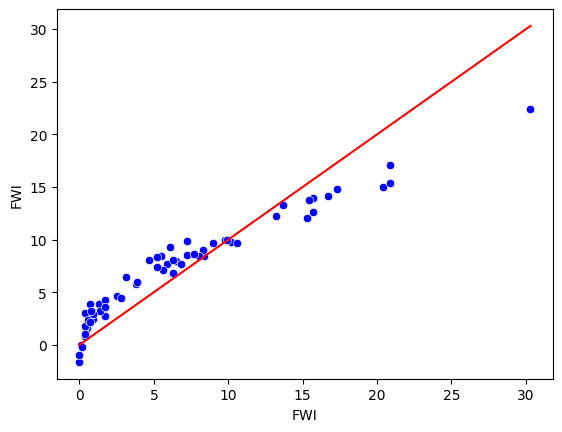

In [43]:
from sklearn.linear_model import ElasticNet

lin = ElasticNet()
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)
sns.scatterplot(x=y_test, y=y_pred, color='blue')
sns.lineplot(x=y_test, y=y_test, color='red')
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}') 
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

In [44]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(rid, open('model.pkl', 'wb'))